# Heart Failure Prediction

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")

In [2]:
df=pd.read_csv("C:/Users/somaa/Downloads/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [5]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.ChestPainType.value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [6]:
df.RestingECG.value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [7]:
df.ExerciseAngina.value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [8]:
df.ST_Slope.value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [27]:
X=df.drop(columns=["HeartDisease","Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"])
from sklearn.preprocessing import StandardScaler
columns_to_scale = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [28]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.825070,-0.551341,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-0.171961,-0.551341,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.770188,-0.551341,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,0.139040,-0.551341,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.034755,-0.551341,Normal,-0.581981,N,-0.832432,Up,0


[Text(1, 0, 'Age'),
 Text(2, 0, 'Cholesterol'),
 Text(3, 0, 'MaxHR'),
 Text(4, 0, 'Oldpeak')]

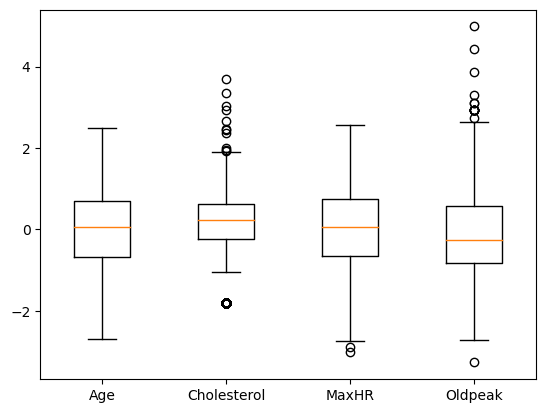

In [31]:
#outlier detection using boxplots
data1=df.Age
data2=df.Cholesterol
data3=df.MaxHR
data4=df.Oldpeak
fig, ax = plt.subplots()
ax.boxplot([data1, data2, data3, data4])
ax.set_xticklabels(['Age', 'Cholesterol', 'MaxHR', "Oldpeak"])

In [47]:
#outlier removal using Z score
df["CholesterolZscore"]=(df.Cholesterol-df.Cholesterol.mean())/df.Cholesterol.std()
df["MaxHRZscore"]=(df.MaxHR-df.MaxHR.mean())/df.MaxHR.std()
df["OldpeakZscore"]=(df.Oldpeak-df.Oldpeak.mean())/df.Oldpeak.std()

df=df[(df.CholesterolZscore>-2) & (df.CholesterolZscore<1)]
df=df[(df.MaxHRZscore>-3) & (df.MaxHRZscore<3)]
df=df[(df.OldpeakZscore>-3) & (df.OldpeakZscore<3)]

[Text(1, 0, 'Cholesterol'), Text(2, 0, 'MaxHR'), Text(3, 0, 'Oldpeak')]

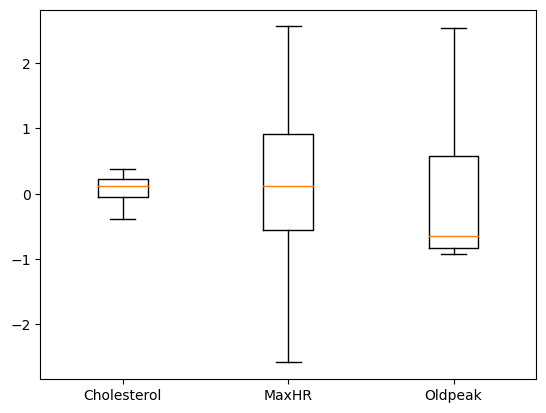

In [48]:
#outlier detection using boxplots
data1=df.Cholesterol
data2=df.MaxHR
data3=df.Oldpeak
fig, ax = plt.subplots()
ax.boxplot([data1, data2, data3])
ax.set_xticklabels(['Cholesterol', 'MaxHR', "Oldpeak"])

In [51]:
#encoding columns with categorical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.HeartDisease=le.fit_transform(df.HeartDisease)
df.ChestPainType=le.fit_transform(df.ChestPainType)
df.RestingECG=le.fit_transform(df.RestingECG)
df.ExerciseAngina=le.fit_transform(df.ExerciseAngina)
df.ST_Slope=le.fit_transform(df.ST_Slope)
df.Sex=le.fit_transform(df.Sex)

In [52]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeZscore,CholesterolZscore,MaxHRZscore,OldpeakZscore
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,0.105664,1,1,-0.478223,-1.094152,0.597587,0.239241
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,0.574711,1,1,-0.584238,0.090135,-1.339615,0.767797
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,-0.832432,2,0,0.051853,-0.571672,-0.774598,-0.817871
6,-0.902775,0,1,-0.129513,0.349422,-0.551341,1,1.304332,0,-0.832432,2,0,-0.902283,0.891271,1.162604,-0.817871
7,0.051881,1,1,-1.210356,0.084157,-0.551341,1,0.203982,0,-0.832432,2,0,0.051853,-0.118857,0.032570,-0.817871


In [53]:
#splitting the dataset in x and y for fitting and prediction
X=df.drop(columns="HeartDisease")
y=df.HeartDisease

In [54]:
#splitting dateset in training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
#we are using 80% of our data for training and rest 20% for testing

In [55]:
#importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [61]:
model_params={
    "logistic_regression":{"model": LogisticRegression(solver='liblinear',multi_class='auto', max_iter=1000),
                          'params': {'C': [0.001, 0.01, 0.1, 1, 10],
                                     'penalty': ['l1', 'l2'],
                                     'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
                                     'max_iter': [5, 10, 15]
                                    }
                          },
    "random_forest" : {"model" : RandomForestClassifier(),
                      "params": {"n_estimators":[1,5,10]}
                      },

    'svm': {'model': svm.SVC(gamma='auto'),
            'params' : {'C': [1,10,20],
                        'kernel': ['rbf','linear']}  
           }
}

In [64]:
#model selection
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })

df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,logistic_regression,0.848743,"{'C': 1, 'max_iter': 15, 'penalty': 'l1', 'sol..."
1,random_forest,0.810871,{'n_estimators': 10}
2,svm,0.855465,"{'C': 1, 'kernel': 'rbf'}"


In [67]:
#using PCA to reduce dimensionality
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X)
X_pca.shape

(364, 8)

In [71]:
#splitting dateset in training and testing dataset
from sklearn.model_selection import train_test_split
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y,test_size=0.2)
#we are using 80% of our data for training and rest 20% for testing

In [69]:
model_params={
    "logistic_regression":{"model": LogisticRegression(solver='liblinear',multi_class='auto', max_iter=1000),
                          'params': {'C': [0.001, 0.01, 0.1, 1, 10],
                                     'penalty': ['l1', 'l2'],
                                     'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
                                     'max_iter': [5, 10, 15]
                                    }
                          },
    "random_forest" : {"model" : RandomForestClassifier(),
                      "params": {"n_estimators":[1,5,10]}
                      },

    'svm': {'model': svm.SVC(gamma='auto'),
            'params' : {'C': [1,10,20],
                        'kernel': ['rbf','linear']}  
           }
}

In [72]:
#model selection
from sklearn.model_selection import GridSearchCV
scores=[]
for model_name, mp in model_params.items():
    clf=GridSearchCV(mp["model"], mp["params"], cv=5, return_train_score=False)
    clf.fit(X_train_pca,y_train)
    scores.append({
        "model": model_name,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })

df1 = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df1

,model,best_score,best_params
0,logistic_regression,0.814436,"{'C': 0.1, 'max_iter': 10, 'penalty': 'l1', 's..."
1,random_forest,0.783402,{'n_estimators': 10}
2,svm,0.800643,"{'C': 1, 'kernel': 'linear'}"
